 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 
 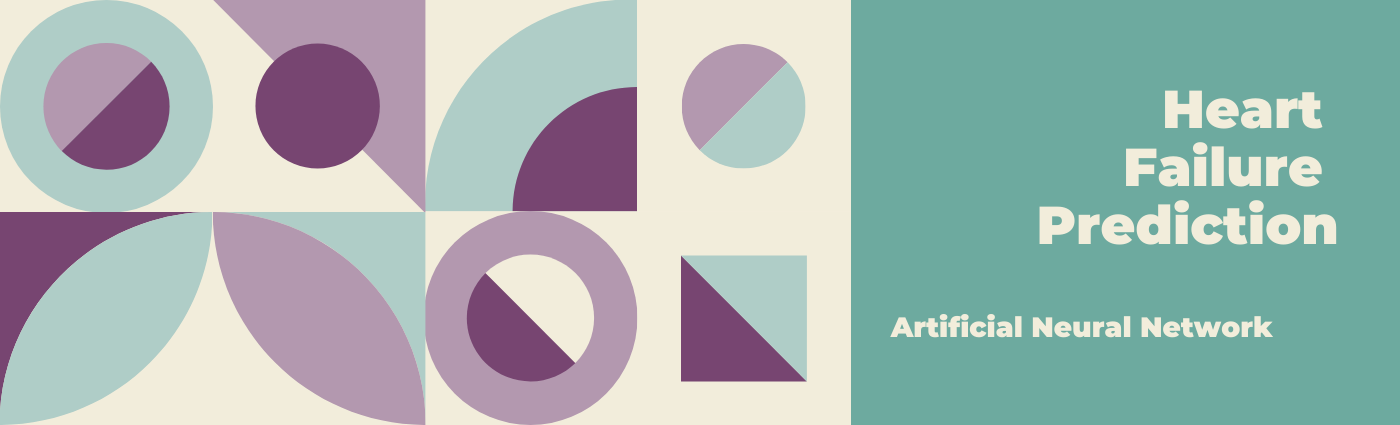

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

2023-02-17 10:02:30.152355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

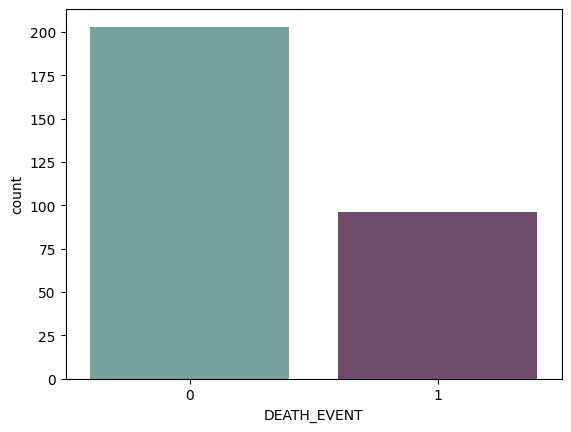

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

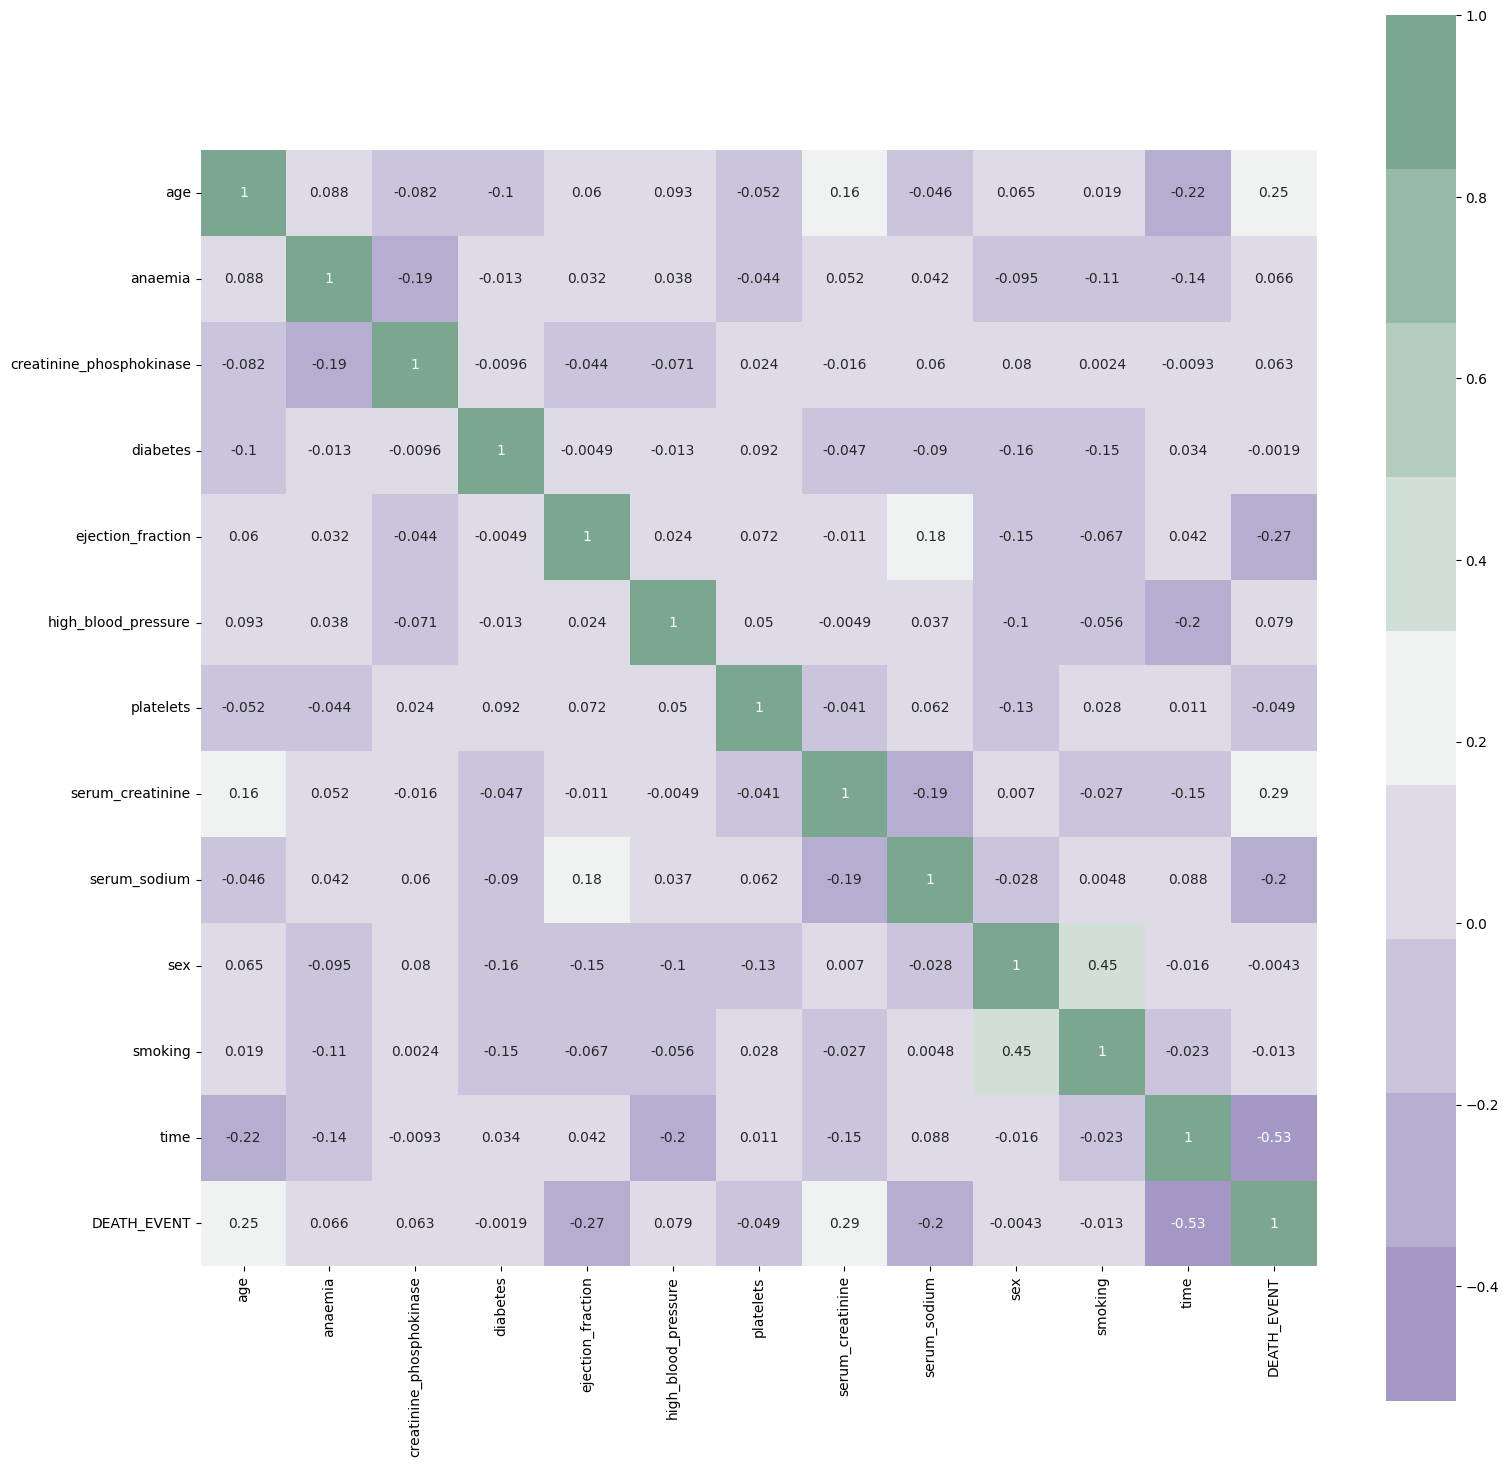

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [7]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [8]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [9]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

monitor: Quantity to be monitored.

min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.

verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped.



In [10]:
import psutil


# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2,)


2023-02-17 10:02:33.094317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shreyanthhg/opt/anaconda3/envs/Tensorflow/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.6929 - accuracy: 0.6592 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.6480 - val_loss: 0.6915 - val_accuracy: 0.6667
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.6480 - val_loss: 0.6906 - val_accuracy: 0.6667
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.6480 - val_loss: 0.6898 - val_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.6480 - val_loss: 0.6889 - val_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.6480 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.6480 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8101 - val_loss: 0.4403 - val_accuracy: 0.8444
Epoch 60/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.7933 - val_loss: 0.4400 - val_accuracy: 0.8444
Epoch 61/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8212 - val_loss: 0.4388 - val_accuracy: 0.8444
Epoch 62/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.7877 - val_loss: 0.4386 - val_accuracy: 0.8444
Epoch 63/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.8045 - val_loss: 0.4393 - val_accuracy: 0.8444
Epoch 64/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.7989 - val_loss: 0.4407 - val_accuracy: 0.8444
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.7821 - val_loss: 0.4422 - val_accuracy: 0.8222
Epoch 66/100
6/6 [===============

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable pa

In [12]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 78.22%


**Plotting training and validation loss over epochs**

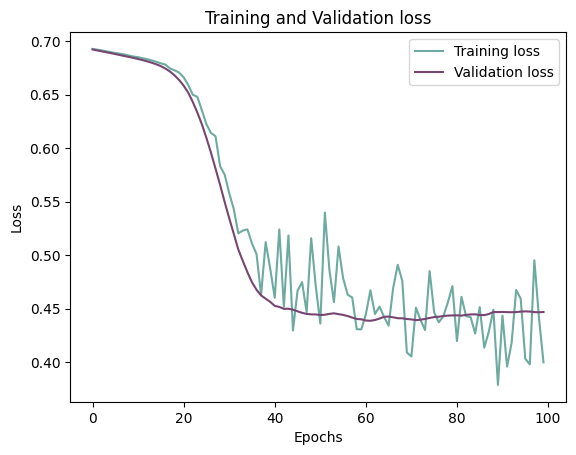

In [13]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

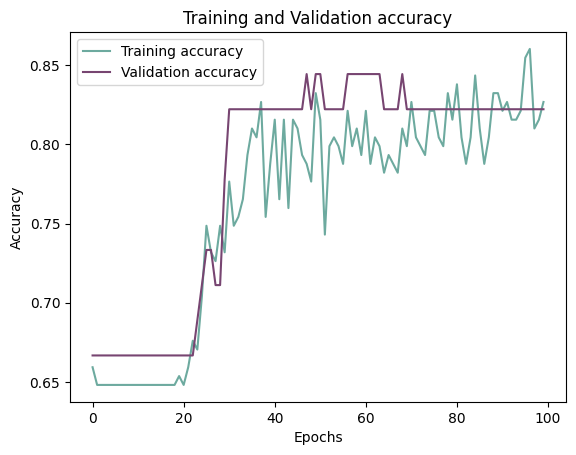

In [14]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [15]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 993us/step


<Axes: >

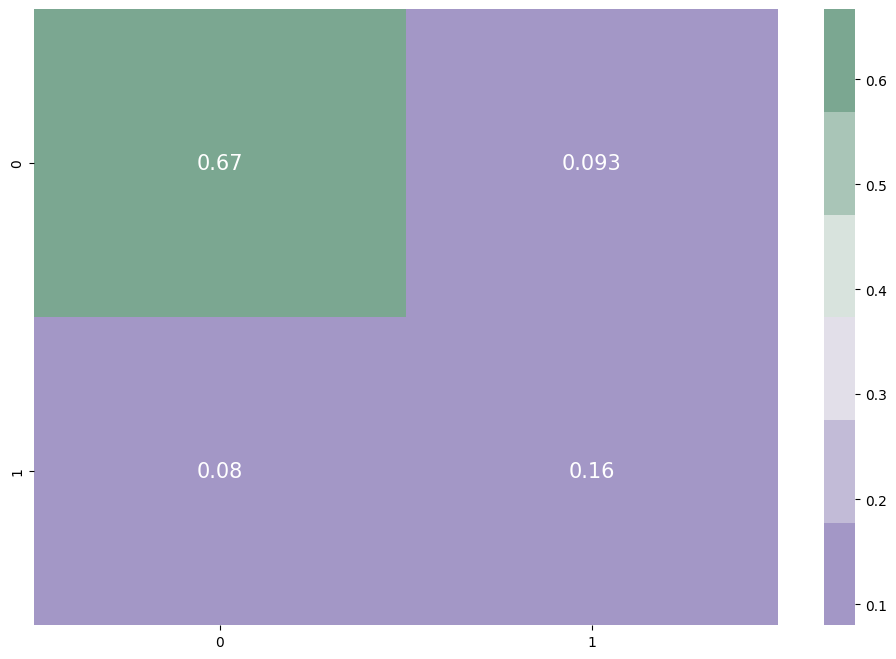

In [16]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.63      0.67      0.65        18

    accuracy                           0.83        75
   macro avg       0.76      0.77      0.77        75
weighted avg       0.83      0.83      0.83        75



# Model performance with Tensorflow in MacOs

In [18]:
# Measure CPU usage
cpu_percent = psutil.cpu_percent(interval=None)
print("CPU Usage: {}%".format(cpu_percent))

# Measure GPU usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU Name:", gpu.name)
        print("GPU Memory:", gpu.memory_limit)
        print("GPU Usage:")
        print(tf.raw_ops.GPUUsage(gpu_name=gpu.name))
else:
        print("No GPU found")

# Measure memory usage
process = psutil.Process()
memory_info = process.memory_info()
print("Memory Usage: {:.2f} MB".format(memory_info.rss / 1024 / 1024))

# Measure time taken for training
start_time = time.time()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size =64, epochs = 1000)
end_time = time.time()
print("Time Taken: {:.2f} seconds".format(end_time - start_time))

CPU Usage: 20.7%
No GPU found
Memory Usage: 483.49 MB
Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8348
Epoch 2/1000
4/4 [==============================] - 0s 975us/step - loss: 0.4386 - accuracy: 0.7902
Epoch 3/1000
4/4 [==============================] - 0s 928us/step - loss: 0.4266 - accuracy: 0.8304
Epoch 4/1000
4/4 [==============================] - 0s 954us/step - loss: 0.4246 - accuracy: 0.8348
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7857
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.8214
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8304
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7991
Epoch 9/1000
4/4 [==============================] - 0s 997us/step - loss: 0.4309 - accuracy: 0.8080
Epoch 10/1000
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 941us/step - loss: 0.3976 - accuracy: 0.8304
Epoch 83/1000
4/4 [==============================] - 0s 850us/step - loss: 0.4259 - accuracy: 0.8571
Epoch 84/1000
4/4 [==============================] - 0s 932us/step - loss: 0.4040 - accuracy: 0.8214
Epoch 85/1000
4/4 [==============================] - 0s 875us/step - loss: 0.4076 - accuracy: 0.8438
Epoch 86/1000
4/4 [==============================] - 0s 883us/step - loss: 0.4076 - accuracy: 0.8616
Epoch 87/1000
4/4 [==============================] - 0s 972us/step - loss: 0.3826 - accuracy: 0.8661
Epoch 88/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8438
Epoch 89/1000
4/4 [==============================] - 0s 905us/step - loss: 0.4009 - accuracy: 0.8170
Epoch 90/1000
4/4 [==============================] - 0s 858us/step - loss: 0.4438 - accuracy: 0.7768
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8393
Epoch 92

Epoch 163/1000
4/4 [==============================] - 0s 903us/step - loss: 0.4096 - accuracy: 0.8393
Epoch 164/1000
4/4 [==============================] - 0s 920us/step - loss: 0.3960 - accuracy: 0.8080
Epoch 165/1000
4/4 [==============================] - 0s 910us/step - loss: 0.3862 - accuracy: 0.8348
Epoch 166/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8304
Epoch 167/1000
4/4 [==============================] - 0s 893us/step - loss: 0.3869 - accuracy: 0.8259
Epoch 168/1000
4/4 [==============================] - 0s 856us/step - loss: 0.3729 - accuracy: 0.8705
Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8616
Epoch 170/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8482
Epoch 171/1000
4/4 [==============================] - 0s 864us/step - loss: 0.3353 - accuracy: 0.8661
Epoch 172/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3716 - accur

4/4 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8571
Epoch 244/1000
4/4 [==============================] - 0s 971us/step - loss: 0.3455 - accuracy: 0.8571
Epoch 245/1000
4/4 [==============================] - 0s 916us/step - loss: 0.3469 - accuracy: 0.8661
Epoch 246/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8571
Epoch 247/1000
4/4 [==============================] - 0s 950us/step - loss: 0.3502 - accuracy: 0.8482
Epoch 248/1000
4/4 [==============================] - 0s 885us/step - loss: 0.3245 - accuracy: 0.8661
Epoch 249/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8482
Epoch 250/1000
4/4 [==============================] - 0s 969us/step - loss: 0.3286 - accuracy: 0.8839
Epoch 251/1000
4/4 [==============================] - 0s 924us/step - loss: 0.3372 - accuracy: 0.8795
Epoch 252/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8438
Epo

4/4 [==============================] - 0s 915us/step - loss: 0.2700 - accuracy: 0.8750
Epoch 324/1000
4/4 [==============================] - 0s 913us/step - loss: 0.2959 - accuracy: 0.8795
Epoch 325/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8661
Epoch 326/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8705
Epoch 327/1000
4/4 [==============================] - 0s 893us/step - loss: 0.2816 - accuracy: 0.8616
Epoch 328/1000
4/4 [==============================] - 0s 921us/step - loss: 0.2940 - accuracy: 0.8795
Epoch 329/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8750
Epoch 330/1000
4/4 [==============================] - 0s 850us/step - loss: 0.3217 - accuracy: 0.8616
Epoch 331/1000
4/4 [==============================] - 0s 831us/step - loss: 0.2879 - accuracy: 0.8839
Epoch 332/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8795
Epo

4/4 [==============================] - 0s 955us/step - loss: 0.2908 - accuracy: 0.8661
Epoch 404/1000
4/4 [==============================] - 0s 939us/step - loss: 0.2652 - accuracy: 0.8884
Epoch 405/1000
4/4 [==============================] - 0s 993us/step - loss: 0.2936 - accuracy: 0.8661
Epoch 406/1000
4/4 [==============================] - 0s 845us/step - loss: 0.2851 - accuracy: 0.8705
Epoch 407/1000
4/4 [==============================] - 0s 909us/step - loss: 0.2535 - accuracy: 0.8839
Epoch 408/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.8973
Epoch 409/1000
4/4 [==============================] - 0s 894us/step - loss: 0.2509 - accuracy: 0.8750
Epoch 410/1000
4/4 [==============================] - 0s 959us/step - loss: 0.2895 - accuracy: 0.8393
Epoch 411/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8527
Epoch 412/1000
4/4 [==============================] - 0s 876us/step - loss: 0.2385 - accuracy: 0.8884

4/4 [==============================] - 0s 906us/step - loss: 0.2776 - accuracy: 0.8482
Epoch 484/1000
4/4 [==============================] - 0s 825us/step - loss: 0.2631 - accuracy: 0.8795
Epoch 485/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.8884
Epoch 486/1000
4/4 [==============================] - 0s 931us/step - loss: 0.2766 - accuracy: 0.8571
Epoch 487/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8795
Epoch 488/1000
4/4 [==============================] - 0s 949us/step - loss: 0.2799 - accuracy: 0.8750
Epoch 489/1000
4/4 [==============================] - 0s 944us/step - loss: 0.2278 - accuracy: 0.8973
Epoch 490/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.8795
Epoch 491/1000
4/4 [==============================] - 0s 811us/step - loss: 0.2366 - accuracy: 0.8973
Epoch 492/1000
4/4 [==============================] - 0s 987us/step - loss: 0.2123 - accuracy: 0.9107
E

4/4 [==============================] - 0s 900us/step - loss: 0.2264 - accuracy: 0.9018
Epoch 564/1000
4/4 [==============================] - 0s 916us/step - loss: 0.2122 - accuracy: 0.9107
Epoch 565/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.8929
Epoch 566/1000
4/4 [==============================] - 0s 890us/step - loss: 0.2509 - accuracy: 0.8705
Epoch 567/1000
4/4 [==============================] - 0s 940us/step - loss: 0.2544 - accuracy: 0.8839
Epoch 568/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.8705
Epoch 569/1000
4/4 [==============================] - 0s 948us/step - loss: 0.2670 - accuracy: 0.8705
Epoch 570/1000
4/4 [==============================] - 0s 883us/step - loss: 0.2566 - accuracy: 0.8661
Epoch 571/1000
4/4 [==============================] - 0s 886us/step - loss: 0.2697 - accuracy: 0.8527
Epoch 572/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8929
E

4/4 [==============================] - 0s 923us/step - loss: 0.2421 - accuracy: 0.8750
Epoch 644/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.8705
Epoch 645/1000
4/4 [==============================] - 0s 903us/step - loss: 0.2117 - accuracy: 0.8973
Epoch 646/1000
4/4 [==============================] - 0s 917us/step - loss: 0.2158 - accuracy: 0.8839
Epoch 647/1000
4/4 [==============================] - 0s 967us/step - loss: 0.2303 - accuracy: 0.8750
Epoch 648/1000
4/4 [==============================] - 0s 944us/step - loss: 0.2286 - accuracy: 0.8884
Epoch 649/1000
4/4 [==============================] - 0s 878us/step - loss: 0.2167 - accuracy: 0.8973
Epoch 650/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.8795
Epoch 651/1000
4/4 [==============================] - 0s 929us/step - loss: 0.2279 - accuracy: 0.8929
Epoch 652/1000
4/4 [==============================] - 0s 884us/step - loss: 0.1974 - accuracy: 0.8973

4/4 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.8795
Epoch 724/1000
4/4 [==============================] - 0s 947us/step - loss: 0.2091 - accuracy: 0.9152
Epoch 725/1000
4/4 [==============================] - 0s 907us/step - loss: 0.2724 - accuracy: 0.8616
Epoch 726/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.8884
Epoch 727/1000
4/4 [==============================] - 0s 913us/step - loss: 0.1897 - accuracy: 0.9152
Epoch 728/1000
4/4 [==============================] - 0s 886us/step - loss: 0.2484 - accuracy: 0.8616
Epoch 729/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.8884
Epoch 730/1000
4/4 [==============================] - 0s 937us/step - loss: 0.1683 - accuracy: 0.9152
Epoch 731/1000
4/4 [==============================] - 0s 889us/step - loss: 0.2227 - accuracy: 0.8795
Epoch 732/1000
4/4 [==============================] - 0s 907us/step - loss: 0.2205 - accuracy: 0.8839
E

Epoch 804/1000
4/4 [==============================] - 0s 899us/step - loss: 0.2343 - accuracy: 0.8839
Epoch 805/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.8884
Epoch 806/1000
4/4 [==============================] - 0s 884us/step - loss: 0.2165 - accuracy: 0.8839
Epoch 807/1000
4/4 [==============================] - 0s 911us/step - loss: 0.2319 - accuracy: 0.8616
Epoch 808/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.8839
Epoch 809/1000
4/4 [==============================] - 0s 936us/step - loss: 0.2219 - accuracy: 0.8795
Epoch 810/1000
4/4 [==============================] - 0s 866us/step - loss: 0.2278 - accuracy: 0.8661
Epoch 811/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1831 - accuracy: 0.9018
Epoch 812/1000
4/4 [==============================] - 0s 920us/step - loss: 0.2104 - accuracy: 0.8795
Epoch 813/1000
4/4 [==============================] - 0s 866us/step - loss: 0.2094 - acc

4/4 [==============================] - 0s 932us/step - loss: 0.2146 - accuracy: 0.8661
Epoch 885/1000
4/4 [==============================] - 0s 921us/step - loss: 0.2273 - accuracy: 0.8795
Epoch 886/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.8973
Epoch 887/1000
4/4 [==============================] - 0s 899us/step - loss: 0.1949 - accuracy: 0.8973
Epoch 888/1000
4/4 [==============================] - 0s 913us/step - loss: 0.2252 - accuracy: 0.8795
Epoch 889/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.8482
Epoch 890/1000
4/4 [==============================] - 0s 858us/step - loss: 0.2362 - accuracy: 0.8571
Epoch 891/1000
4/4 [==============================] - 0s 999us/step - loss: 0.2493 - accuracy: 0.8571
Epoch 892/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.8795
Epoch 893/1000
4/4 [==============================] - 0s 896us/step - loss: 0.1961 - accuracy: 0.8929
E

Epoch 965/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.8616
Epoch 966/1000
4/4 [==============================] - 0s 895us/step - loss: 0.1938 - accuracy: 0.8929
Epoch 967/1000
4/4 [==============================] - 0s 899us/step - loss: 0.1833 - accuracy: 0.9196
Epoch 968/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.8795
Epoch 969/1000
4/4 [==============================] - 0s 873us/step - loss: 0.2649 - accuracy: 0.8527
Epoch 970/1000
4/4 [==============================] - 0s 935us/step - loss: 0.1904 - accuracy: 0.8973
Epoch 971/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.8973
Epoch 972/1000
4/4 [==============================] - 0s 878us/step - loss: 0.2042 - accuracy: 0.9018
Epoch 973/1000
4/4 [==============================] - 0s 910us/step - loss: 0.2321 - accuracy: 0.8661
Epoch 974/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1996 - accur